In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv('co2_emmision.csv')

In [32]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [33]:
data.drop(['Make'  , 'Model' , 'Transmission'] , axis = 1 , inplace = True)

In [34]:
dumm  = pd.get_dummies(data[['Vehicle Class' , 'Fuel Type']])

In [35]:
data = data.drop(['Vehicle Class' , 'Fuel Type'] , axis =1 )

In [36]:
data = pd.concat([data , dumm] , axis = 1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,...,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [140]:
X_train , X_test , y_train , y_test = train_test_split(data.drop('CO2 Emissions(g/km)'  , axis = 1) , data['CO2 Emissions(g/km)'] )

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
import seaborn as sns

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
param = {'max_depth' : [5,10,15,20] , 'n_estimators' : [10,50,100,250]}

In [77]:
from sklearn.model_selection import GridSearchCV

In [79]:
model = GridSearchCV(RandomForestRegressor() , param , refit = True , verbose = 3)

In [69]:
m

In [141]:
model.fit(X_train , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ........ max_depth=5, n_estimators=10, score=0.990, total=   0.1s
[CV] max_depth=5, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=10, score=0.990, total=   0.1s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ........ max_depth=5, n_estimators=10, score=0.989, total=   0.1s
[CV] max_depth=5, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ max_depth=5, n_estimators=10, score=0.989, total=   0.1s
[CV] max_depth=5, n_estimators=10 ....................................
[CV] ........ max_depth=5, n_estimators=10, score=0.990, total=   0.1s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.990, total=   0.5s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.989, total=   0.5s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.991, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.990, total=   0.4s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.991, total=   0.5s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .

[CV] ....... max_depth=20, n_estimators=10, score=0.997, total=   0.2s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.998, total=   0.2s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.998, total=   0.2s
[CV] max_depth=20, n_estimators=10 ...................................
[CV] ....... max_depth=20, n_estimators=10, score=0.998, total=   0.2s
[CV] max_depth=20, n_estimators=50 ...................................
[CV] ....... max_depth=20, n_estimators=50, score=0.996, total=   0.9s
[CV] max_depth=20, n_estimators=50 ...................................
[CV] ....... max_depth=20, n_estimators=50, score=0.996, total=   0.9s
[CV] max_depth=20, n_estimators=50 ...................................
[CV] ....... max_depth=20, n_estimators=50, score=0.998, total=   1.0s
[CV] max_depth=20, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.0min finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 250]},
             verbose=3)

In [142]:
model.best_estimator_

RandomForestRegressor(max_depth=15, n_estimators=50)

In [143]:
rfr = RandomForestRegressor(max_depth=15, n_estimators=50)

In [144]:
rfr.fit(X_train , y_train)

RandomForestRegressor(max_depth=15, n_estimators=50)

In [145]:
pred = rfr.predict(X_test)

<AxesSubplot:ylabel='CO2 Emissions(g/km)'>

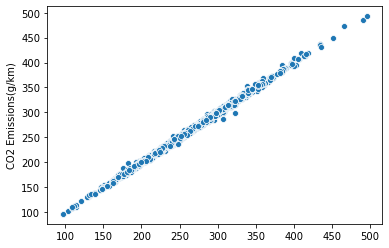

In [146]:
sns.scatterplot(pred , y_test)

In [147]:
print(mean_absolute_error(y_test , pred))

1.7394503392959817


In [148]:
import pickle

In [149]:
filename = 'finalized_model.sav'

In [150]:
pickle.dump(model, open(filename, 'wb'))

In [151]:
loaded_model = pickle.load(open(filename, 'rb'))

In [152]:
pred = loaded_model.predict(X_test)

<AxesSubplot:ylabel='CO2 Emissions(g/km)'>

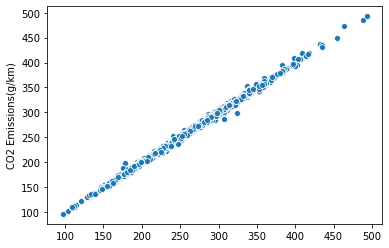

In [153]:
sns.scatterplot(pred , y_test)

In [118]:
#AGAIN SPLITTING DATA IN TRAIN AND TEST FORMS

In [119]:
X_train , X_test , y_train , y_test = train_test_split(data.drop('CO2 Emissions(g/km)'  , axis = 1) , data['CO2 Emissions(g/km)'] )

In [139]:
X_test.iloc[0, :]

Engine Size(L)                             3.5
Cylinders                                  6.0
Fuel Consumption City (L/100 km)          12.8
Fuel Consumption Hwy (L/100 km)            9.3
Fuel Consumption Comb (L/100 km)          11.3
Fuel Consumption Comb (mpg)               25.0
Vehicle Class_COMPACT                      0.0
Vehicle Class_FULL-SIZE                    0.0
Vehicle Class_MID-SIZE                     0.0
Vehicle Class_MINICOMPACT                  0.0
Vehicle Class_MINIVAN                      0.0
Vehicle Class_PICKUP TRUCK - SMALL         0.0
Vehicle Class_PICKUP TRUCK - STANDARD      0.0
Vehicle Class_SPECIAL PURPOSE VEHICLE      0.0
Vehicle Class_STATION WAGON - MID-SIZE     0.0
Vehicle Class_STATION WAGON - SMALL        0.0
Vehicle Class_SUBCOMPACT                   0.0
Vehicle Class_SUV - SMALL                  1.0
Vehicle Class_SUV - STANDARD               0.0
Vehicle Class_TWO-SEATER                   0.0
Vehicle Class_VAN - CARGO                  0.0
Vehicle Class

In [ ]:
# Creating Pipelines